# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
data = pd.read_csv('/kaggle/input/thyroid-cancer-risk-prediction-dataset/thyroid_cancer_risk_data.csv')

In [3]:
data.head(3)

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign


# Checking for missing values

In [4]:
data.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [5]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [6]:
data['Diagnosis'].unique()

array(['Benign', 'Malignant'], dtype=object)

# Number of People with Malignant Thyroid Cancer by Country

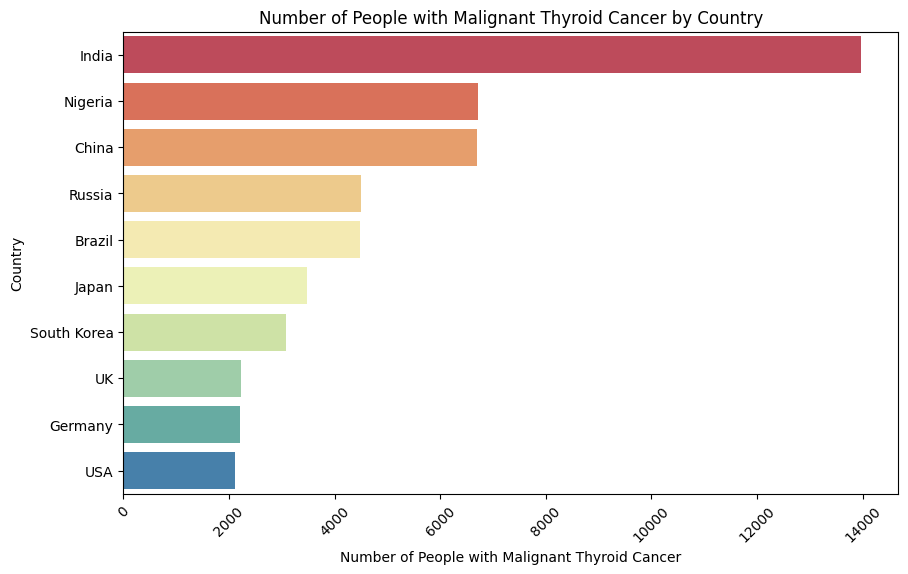

In [7]:
Diagnosis_count = data[data['Diagnosis'] == 'Malignant'].groupby('Country').size().reset_index(name='count')
Diagnosis_count = Diagnosis_count.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=Diagnosis_count, y='Country', x='count', palette='Spectral')
plt.title('Number of People with Malignant Thyroid Cancer by Country')
plt.xlabel('Number of People with Malignant Thyroid Cancer')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

# Number of People with Malignant Thyroid Cancer by Ethnicity

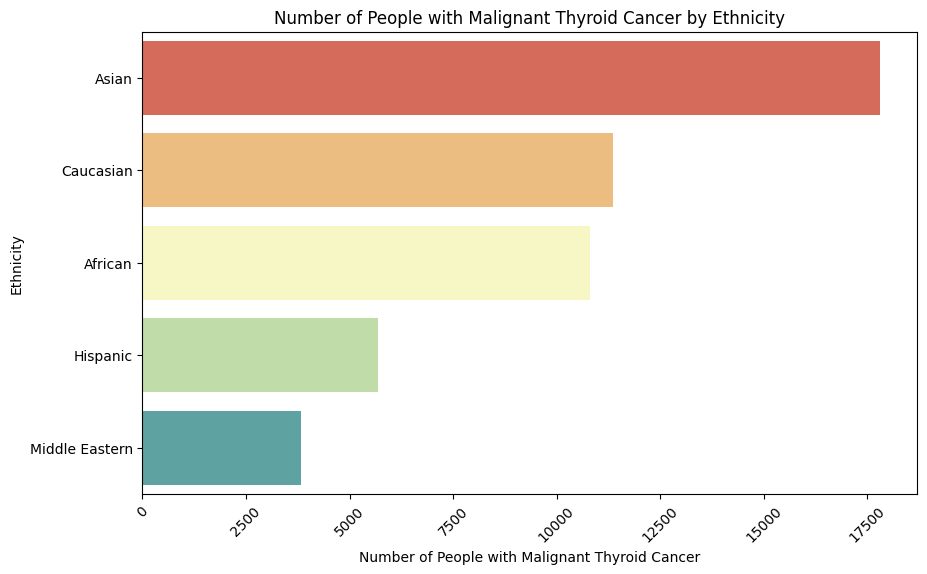

In [8]:
Diagnosis_count = data[data['Diagnosis'] == 'Malignant'].groupby('Ethnicity').size().reset_index(name='count')
Diagnosis_count = Diagnosis_count.sort_values(by='count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=Diagnosis_count, y='Ethnicity', x='count', palette='Spectral')
plt.title('Number of People with Malignant Thyroid Cancer by Ethnicity')
plt.xlabel('Number of People with Malignant Thyroid Cancer')
plt.ylabel('Ethnicity')
plt.xticks(rotation=45)
plt.show()

# Number of People with Malignant & Benign Thyroid Cancer by Family history

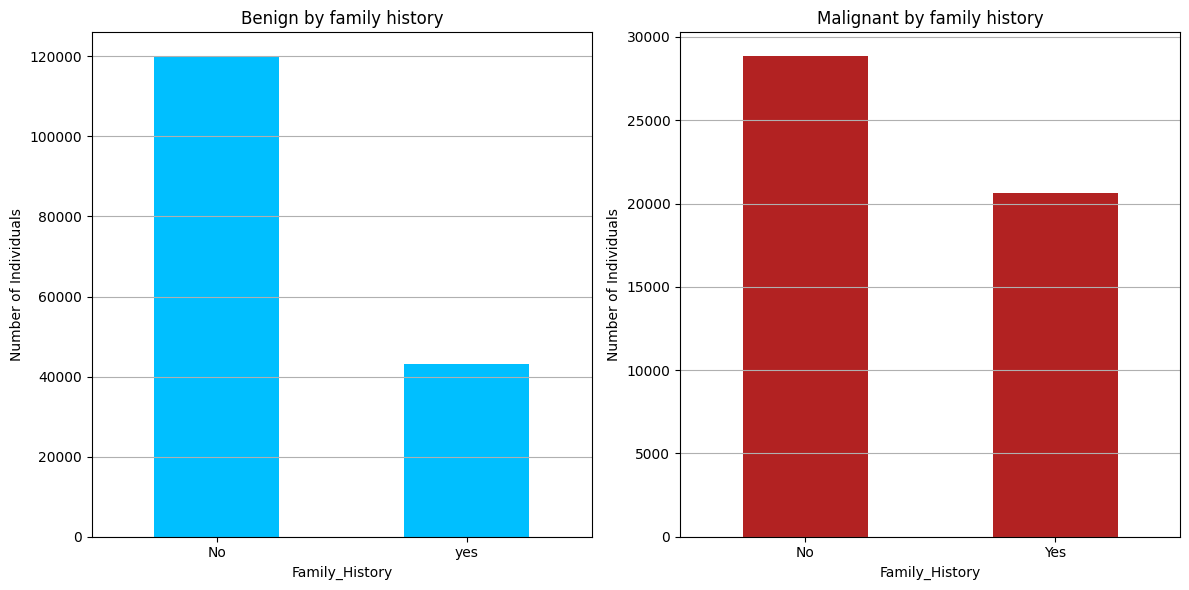

In [9]:
thy_counts = data.groupby(['Family_History', 'Diagnosis']).size().unstack()

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for individuals with Benign
thy_counts.get('Benign', pd.Series()).plot(kind='bar', stacked=True, ax=axes[0], color='deepskyblue')
axes[0].set_title('Benign by family history')
axes[0].set_ylabel('Number of Individuals')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'yes'], rotation=0)
axes[0].grid(axis='y')

# Plot for individuals with Malignant
thy_counts.get('Malignant', pd.Series()).plot(kind='bar', stacked=True, ax=axes[1], color='firebrick')
axes[1].set_title('Malignant by family history')
axes[1].set_ylabel('Number of Individuals')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()